<a href="https://colab.research.google.com/github/zhangyingchengqi/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Feed_forward_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Forward Propagation 前向传播测试

In [2]:
import numpy as np
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

In [ ]:
import numpy as np
# 输入inputs在网络中向前传播时，得到均方误差
def feed_forward(inputs,outputs, weights):
  pre_hidden=np.dot( inputs,weights[0])+weights[1]   # 隐藏层激活前的值   weights[1] 为偏置项
  hidden=1/(1+np.exp( -pre_hidden) )  #  应用了 sigmoid 激活函数,  其它激活函数还有RELU, ,TahH, Linear函数
  pred_out=np.dot( hidden, weights[2]) +weights[3]   #输出层的值      weights[3]为偏置项
  mean_squared_error=np.mean( np.square(pred_out-outputs )  )  #连续值 ： 均方误差计算
  return mean_squared_error   #返回损失

In [ ]:
#以下是各种激活函数的学习及测试
import numpy as np
import matplotlib.pyplot as plt

1. 双曲正切函数

输出范围：Tanh 函数的输出值在 -1 到 1 之间

Tanh 是 奇函数, 零中心化, 零中心化的激活函数可以帮助梯度下降更加稳定，有助于加收敛

优点:
1. 零中心化：Tanh 的输出范围为 [-1, 1]，因此对称性有助于梯度下降更平稳地进行。

2. 适用于递归神经网络：Tanh 能有效地传播信号，帮助 RNN、LSTM 等模型处理时序数据中的依赖关系。

3. 相比 Sigmoid 更适用于深层网络：因为它的输出是零中心的，能帮助模型更快收敛。

缺点:
1. 梯度消失问题：在输入较大或较小的值时，Tanh 函数的梯度会变得非常小，导致反向传播时梯度消失，模型训练速度变慢。

2. 计算复杂：Tanh 比 ReLU 计算更复杂，ReLU 函数的计算是简单的线性运算（max(0, x)），而 Tanh 涉及指数运算，计算开销较大

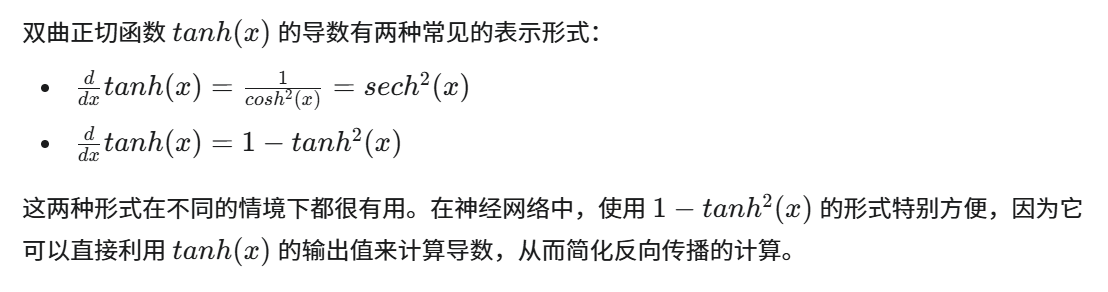

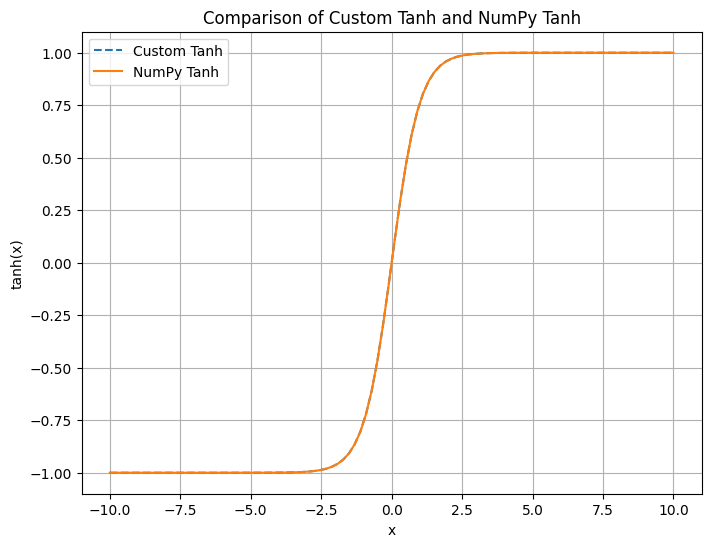

First 5 values of custom tanh(x): [-1.         -0.99999999 -0.99999999 -0.99999999 -0.99999998]
First 5 values of NumPy tanh(x): [-1.         -0.99999999 -0.99999999 -0.99999999 -0.99999998]


In [4]:
#1. Tanh:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/( np.exp(x)+np.exp(-x) )

#测试Tanh函数的功能:
# 测试Tanh函数的功能
x_values = np.linspace(-10, 10, 100)  # 生成从 -10 到 10 的 100 个点

# 使用我们自己定义的 tanh 函数
tanh_values = tanh(x_values)

# 使用 NumPy 的 tanh 函数
np_tanh_values = np.tanh(x_values)

# 绘制图表，比较两个 Tanh 函数的输出
plt.figure(figsize=(8, 6))
plt.plot(x_values, tanh_values, label='Custom Tanh', linestyle='--')
plt.plot(x_values, np_tanh_values, label='NumPy Tanh', linestyle='-')
plt.title('Comparison of Custom Tanh and NumPy Tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.legend()
plt.grid(True)
plt.show()

# 打印前几个值进行比较
print("First 5 values of custom tanh(x):", tanh_values[:5])
print("First 5 values of NumPy tanh(x):", np_tanh_values[:5])

# 证明自己定义的tanh函数的正确性

2. ReLU 函数

相比于 Sigmoid 和 Tanh，ReLU 在正数区域的梯度是常数（即 1），因此能有效避免梯度消失问题，特别是在深层网络中，能够让反向传播过程更加顺利

死神经元：当 ReLU 接收到负值时，会输出 0，这会导致某些神经元在训练过程中永远不能激活。这个问题通常被称为“死神经元问题”（Dead Neurons）。即如果一个神经元的输入总是负值，那么它的输出始终为 0，导致该神经元无法再参与网络的学习过程。常见的解决方法是使用 Leaky ReLU 或 ELU 等变种。

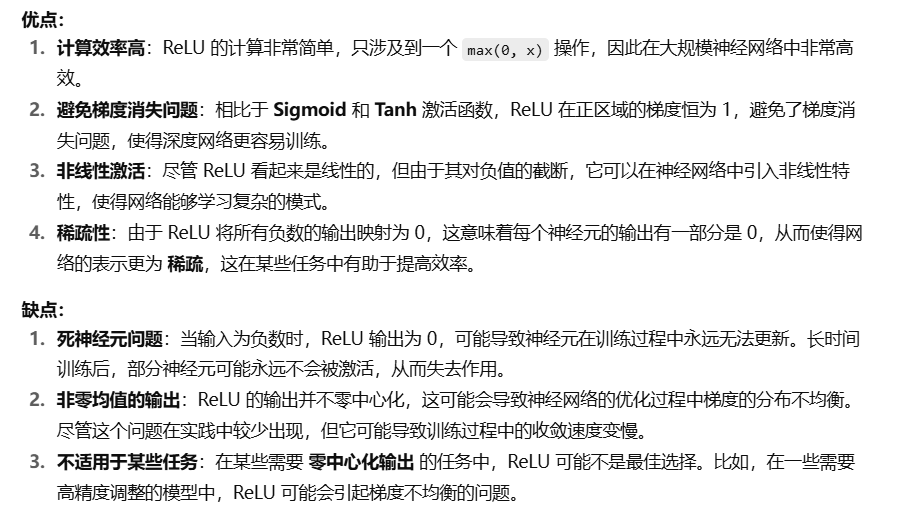

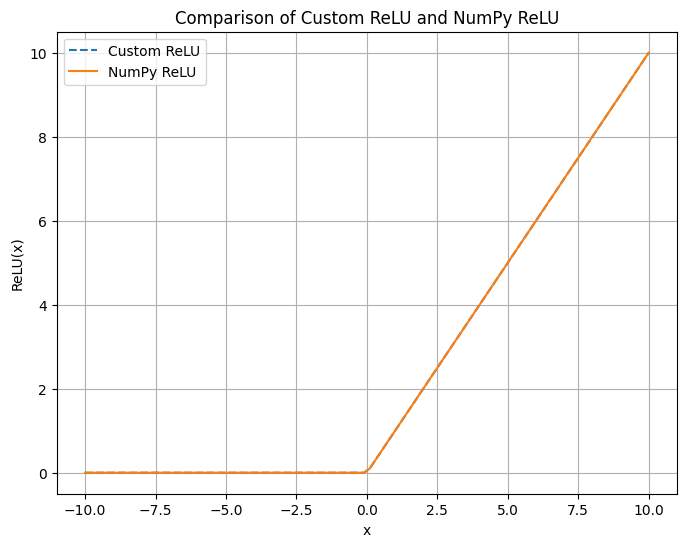

First 5 values of custom relu(x): [0. 0. 0. 0. 0.]
First 5 values of NumPy relu(x): [0. 0. 0. 0. 0.]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. ReLU 激活函数
def relu(x):
    return np.where(x > 0, x, 0)

# 测试 ReLU 函数的功能
x_values = np.linspace(-10, 10, 100)  # 生成从 -10 到 10 的 100 个点

# 使用我们自己定义的 ReLU 函数
relu_values = relu(x_values)

# 使用 NumPy 的 maximum 函数（它也是实现 ReLU 的方法）
np_relu_values = np.maximum(0, x_values)

# 绘制图表，比较两个 ReLU 函数的输出
plt.figure(figsize=(8, 6))
plt.plot(x_values, relu_values, label='Custom ReLU', linestyle='--')
plt.plot(x_values, np_relu_values, label='NumPy ReLU', linestyle='-')
plt.title('Comparison of Custom ReLU and NumPy ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.legend()
plt.grid(True)
plt.show()

# 打印前几个值进行比较
print("First 5 values of custom relu(x):", relu_values[:5])
print("First 5 values of NumPy relu(x):", np_relu_values[:5])

3. softmax函数


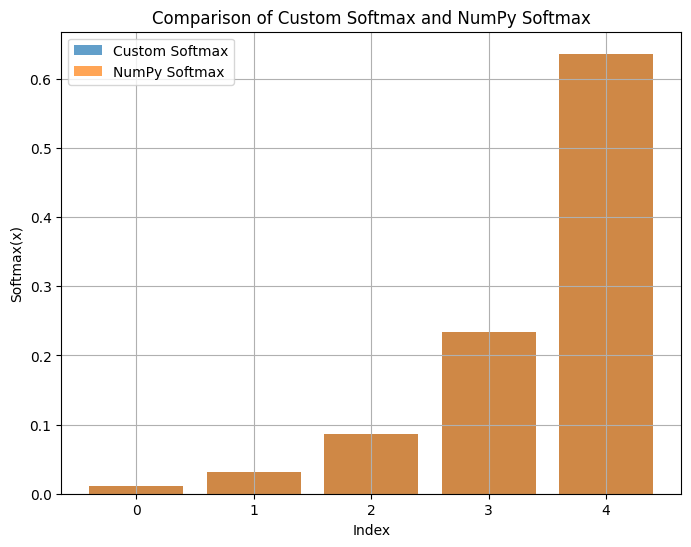

Custom Softmax output: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
NumPy Softmax output: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [7]:
# 1. Softmax 激活函数
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# 测试 Softmax 函数的功能
x_values = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # 示例输入

# 使用我们自己定义的 softmax 函数
softmax_values = softmax(x_values)

# 使用 NumPy 的 softmax 函数（np.exp 计算 softmax 时也可实现）
np_softmax_values = np.exp(x_values) / np.sum(np.exp(x_values))

# 绘制图表，比较两个 Softmax 函数的输出
plt.figure(figsize=(8, 6))
plt.bar(range(len(x_values)), softmax_values, label='Custom Softmax', alpha=0.7)
plt.bar(range(len(x_values)), np_softmax_values, label='NumPy Softmax', alpha=0.7)
plt.title('Comparison of Custom Softmax and NumPy Softmax')
plt.xlabel('Index')
plt.ylabel('Softmax(x)')
plt.legend()
plt.grid(True)
plt.show()

# 打印输出进行比较
print("Custom Softmax output:", softmax_values)
print("NumPy Softmax output:", np_softmax_values)


3. 损失函数
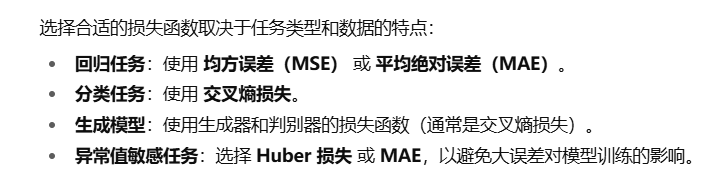

(1). 均方误差

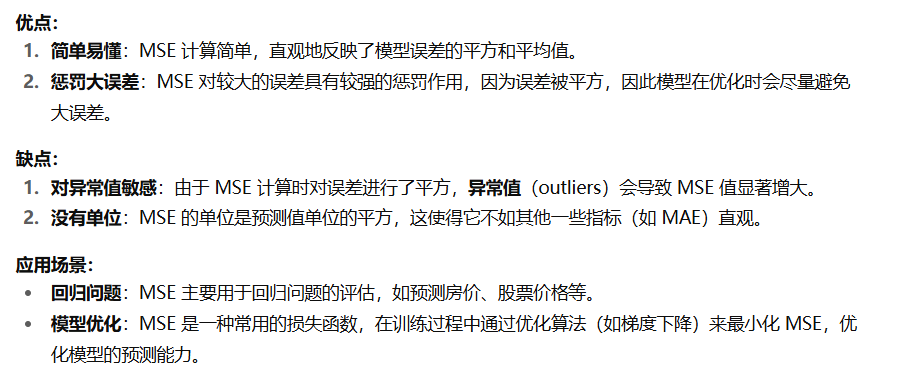

In [6]:
def mse( p, y ):
  return np.mean( np.square(p-y)  )

(2) 平均绝对误差

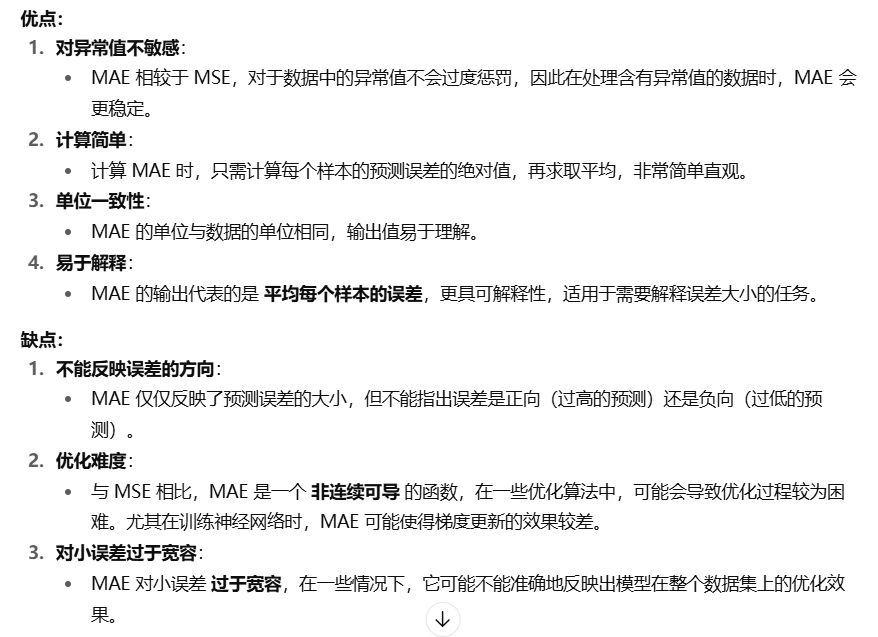

In [ ]:
def mae(p,y):
  return np.mean( np.abs(p-y) )

(3) 二元交叉熵

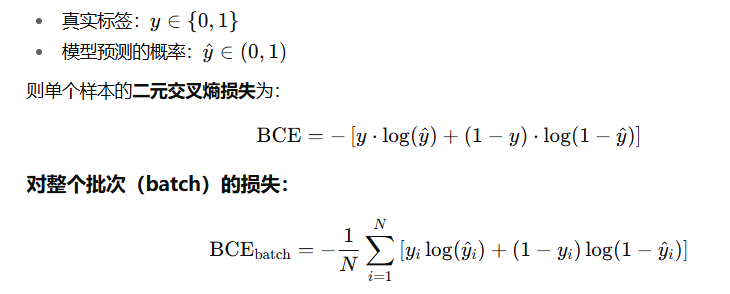

In [2]:
import numpy as np

def binary_cross_entropy(y_true, y_pred, eps=1e-15):
    # 避免 log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 测试样本
y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.4, 0.2])

loss = binary_cross_entropy(y_true, y_pred)
print("Binary Cross-Entropy Loss:", loss)

Binary Cross-Entropy Loss: 0.3146597731636454


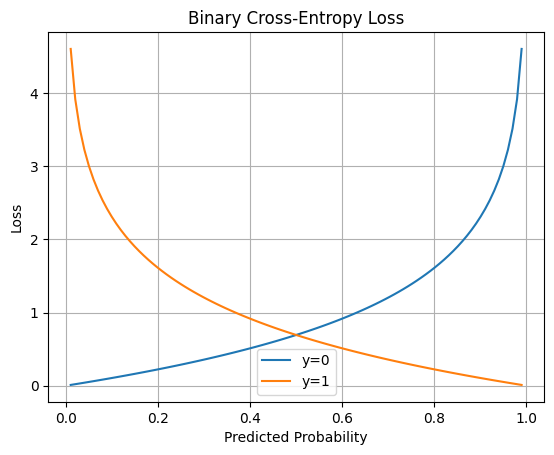

In [3]:
# BCE二分类
import matplotlib.pyplot as plt

y_vals = [0, 1]
x = np.linspace(0.01, 0.99, 100)
for y in y_vals:
    loss = - (y * np.log(x) + (1 - y) * np.log(1 - x))
    plt.plot(x, loss, label=f"y={y}")

plt.title("Binary Cross-Entropy Loss")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

(4) 分类交叉熵

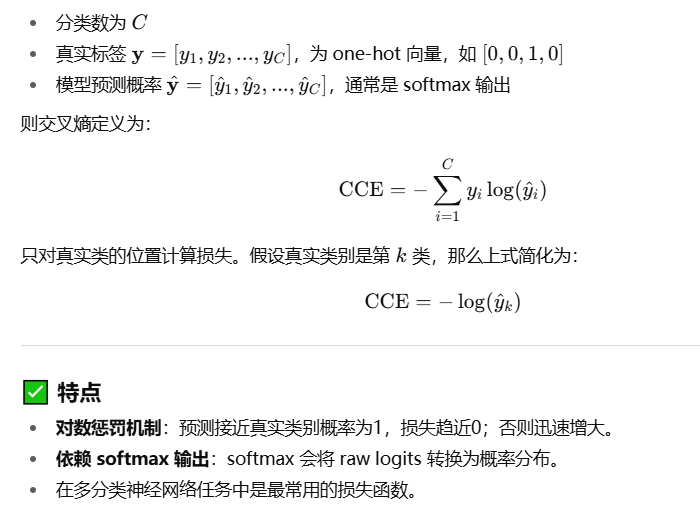

In [4]:
import numpy as np

def categorical_cross_entropy(y_true, y_pred, eps=1e-15):
    # 避免 log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

# 示例：3个类别，两个样本
y_true = np.array([
    [1, 0, 0],  # 类别 0
    [0, 0, 1]   # 类别 2
])

y_pred = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.2, 0.7]
])

loss = categorical_cross_entropy(y_true, y_pred)
print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: 0.35667494393873245
